pytorch加载数据主要学习了两种：只有图片的数据集和有scv保存标签的数据集
而第一种只有图片的数据集的加载又分为两种：标签在文件夹上的和标签在图片名上的

1第一种标签在文件夹上的数据加载方法

    1.1 完整程序
    
2 第二种标签在图片名上的数据加载方法

    2.1 完整程序
    
3 将数据集分为训练集，验证集和测试集的方法

    3.1 完整程序
    
4 .csv文件存储标签的数据集的加载的方法

    4.1 完整程序
    

# 1第一种标签在文件夹上的数据加载方法

如下图所示：
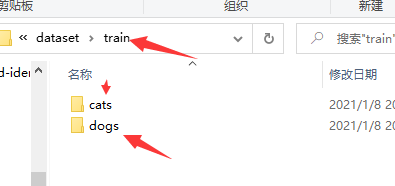

这种类型的数据集导入是很方便的可以直接调用pytorch中的ImageFolder进行载入

首先需要做的事情便是导入需要用到的库

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, utils,datasets
from PIL import Image
import pandas as pd
import numpy as np
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

上面的语句是由于我的python与torch版本不匹配才加的与加载数据无关

import warnings
warnings.filterwarnings("ignore")

而这两句则是为了将程序运行时的警告显示去除用的

然后添加数据增强函数transforms

In [27]:
# data_transform = transforms.Compose([
#   transforms.RandomSizedCrop(32),
#   transforms.RandomHorizontalFlip(),
#   transforms.ToTensor(),
#   transforms.Normalize(mean=[0.492, 0.461, 0.417],
#         std=[0.256, 0.248, 0.251])
#  ])
data_transform = transforms.Compose([
 transforms.Resize(32), # 缩放图片(Image)，保持长宽比不变，最短边为32像素
 transforms.CenterCrop(32), # 从图片中间切出32*32的图片
 transforms.ToTensor(), # 将图片(Image)转成Tensor，归一化至[0, 1]
 transforms.Normalize(mean=[0.492, 0.461, 0.417], std=[0.256, 0.248, 0.251]) # 标准化至[-1, 1]，规定均值和标准差
])

此函数的作用是对图片进行标准化和归一化
Resize(32)缩放图片(Image)，保持长宽比不变，最短边为32像素
CenterCrop(32)从图片中间切出32*32的图片
RandomSizedCrop(32)这一句的作用是对原图进行随机大小和高宽比的裁剪，最后的尺寸为32x32

RandomHorizontalFlip()这个则是对原图像根据概率进行随机水平翻转

transforms.ToTensor()将图片转化为张量，并使图片的形式表现为通道x高x宽的形式

transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])这个则是对数据
进行正则化操作，第一个参数为均值，第二个参数为标准差。这两个值我是使用程序进行计算的。

代码如下：

In [28]:
import numpy as np
import cv2
import os
 
# img_h, img_w = 32, 32
img_h, img_w = 32, 32   #经过处理后你的图片的尺寸大小
means, stdevs = [], []
img_list = []
 
imgs_path = "F:\\jupyter\\pytorch\\data\\dogs_cats\\dataset\\train\\dogs"#数据集的路径采用绝对引用
imgs_path_list = os.listdir(imgs_path)
 
len_ = len(imgs_path_list)
i = 0
for item in imgs_path_list:
    img = cv2.imread(os.path.join(imgs_path,item))
    img = cv2.resize(img,(img_w,img_h))
    img = img[:, :, :, np.newaxis]
    img_list.append(img)
    i += 1
    print(i,'/',len_)    
 
imgs = np.concatenate(img_list, axis=3)
imgs = imgs.astype(np.float32) / 255.
 
for i in range(3):
    pixels = imgs[:, :, i, :].ravel()  # 拉成一行
    means.append(np.mean(pixels))
    stdevs.append(np.std(pixels))
 
# BGR --> RGB ， CV读取的需要转换，PIL读取的不用转换
means.reverse()
stdevs.reverse()
 
print("normMean = {}".format(means))
print("normStd = {}".format(stdevs))

1 / 12500
2 / 12500
3 / 12500
4 / 12500
5 / 12500
6 / 12500
7 / 12500
8 / 12500
9 / 12500
10 / 12500
11 / 12500
12 / 12500
13 / 12500
14 / 12500
15 / 12500
16 / 12500
17 / 12500
18 / 12500
19 / 12500
20 / 12500
21 / 12500
22 / 12500
23 / 12500
24 / 12500
25 / 12500
26 / 12500
27 / 12500
28 / 12500
29 / 12500
30 / 12500
31 / 12500
32 / 12500
33 / 12500
34 / 12500
35 / 12500
36 / 12500
37 / 12500
38 / 12500
39 / 12500
40 / 12500
41 / 12500
42 / 12500
43 / 12500
44 / 12500
45 / 12500
46 / 12500
47 / 12500
48 / 12500
49 / 12500
50 / 12500
51 / 12500
52 / 12500
53 / 12500
54 / 12500
55 / 12500
56 / 12500
57 / 12500
58 / 12500
59 / 12500
60 / 12500
61 / 12500
62 / 12500
63 / 12500
64 / 12500
65 / 12500
66 / 12500
67 / 12500
68 / 12500
69 / 12500
70 / 12500
71 / 12500
72 / 12500
73 / 12500
74 / 12500
75 / 12500
76 / 12500
77 / 12500
78 / 12500
79 / 12500
80 / 12500
81 / 12500
82 / 12500
83 / 12500
84 / 12500
85 / 12500
86 / 12500
87 / 12500
88 / 12500
89 / 12500
90 / 12500
91 / 12500
92 / 125

719 / 12500
720 / 12500
721 / 12500
722 / 12500
723 / 12500
724 / 12500
725 / 12500
726 / 12500
727 / 12500
728 / 12500
729 / 12500
730 / 12500
731 / 12500
732 / 12500
733 / 12500
734 / 12500
735 / 12500
736 / 12500
737 / 12500
738 / 12500
739 / 12500
740 / 12500
741 / 12500
742 / 12500
743 / 12500
744 / 12500
745 / 12500
746 / 12500
747 / 12500
748 / 12500
749 / 12500
750 / 12500
751 / 12500
752 / 12500
753 / 12500
754 / 12500
755 / 12500
756 / 12500
757 / 12500
758 / 12500
759 / 12500
760 / 12500
761 / 12500
762 / 12500
763 / 12500
764 / 12500
765 / 12500
766 / 12500
767 / 12500
768 / 12500
769 / 12500
770 / 12500
771 / 12500
772 / 12500
773 / 12500
774 / 12500
775 / 12500
776 / 12500
777 / 12500
778 / 12500
779 / 12500
780 / 12500
781 / 12500
782 / 12500
783 / 12500
784 / 12500
785 / 12500
786 / 12500
787 / 12500
788 / 12500
789 / 12500
790 / 12500
791 / 12500
792 / 12500
793 / 12500
794 / 12500
795 / 12500
796 / 12500
797 / 12500
798 / 12500
799 / 12500
800 / 12500
801 / 12500
802 

1384 / 12500
1385 / 12500
1386 / 12500
1387 / 12500
1388 / 12500
1389 / 12500
1390 / 12500
1391 / 12500
1392 / 12500
1393 / 12500
1394 / 12500
1395 / 12500
1396 / 12500
1397 / 12500
1398 / 12500
1399 / 12500
1400 / 12500
1401 / 12500
1402 / 12500
1403 / 12500
1404 / 12500
1405 / 12500
1406 / 12500
1407 / 12500
1408 / 12500
1409 / 12500
1410 / 12500
1411 / 12500
1412 / 12500
1413 / 12500
1414 / 12500
1415 / 12500
1416 / 12500
1417 / 12500
1418 / 12500
1419 / 12500
1420 / 12500
1421 / 12500
1422 / 12500
1423 / 12500
1424 / 12500
1425 / 12500
1426 / 12500
1427 / 12500
1428 / 12500
1429 / 12500
1430 / 12500
1431 / 12500
1432 / 12500
1433 / 12500
1434 / 12500
1435 / 12500
1436 / 12500
1437 / 12500
1438 / 12500
1439 / 12500
1440 / 12500
1441 / 12500
1442 / 12500
1443 / 12500
1444 / 12500
1445 / 12500
1446 / 12500
1447 / 12500
1448 / 12500
1449 / 12500
1450 / 12500
1451 / 12500
1452 / 12500
1453 / 12500
1454 / 12500
1455 / 12500
1456 / 12500
1457 / 12500
1458 / 12500
1459 / 12500
1460 / 12500

2028 / 12500
2029 / 12500
2030 / 12500
2031 / 12500
2032 / 12500
2033 / 12500
2034 / 12500
2035 / 12500
2036 / 12500
2037 / 12500
2038 / 12500
2039 / 12500
2040 / 12500
2041 / 12500
2042 / 12500
2043 / 12500
2044 / 12500
2045 / 12500
2046 / 12500
2047 / 12500
2048 / 12500
2049 / 12500
2050 / 12500
2051 / 12500
2052 / 12500
2053 / 12500
2054 / 12500
2055 / 12500
2056 / 12500
2057 / 12500
2058 / 12500
2059 / 12500
2060 / 12500
2061 / 12500
2062 / 12500
2063 / 12500
2064 / 12500
2065 / 12500
2066 / 12500
2067 / 12500
2068 / 12500
2069 / 12500
2070 / 12500
2071 / 12500
2072 / 12500
2073 / 12500
2074 / 12500
2075 / 12500
2076 / 12500
2077 / 12500
2078 / 12500
2079 / 12500
2080 / 12500
2081 / 12500
2082 / 12500
2083 / 12500
2084 / 12500
2085 / 12500
2086 / 12500
2087 / 12500
2088 / 12500
2089 / 12500
2090 / 12500
2091 / 12500
2092 / 12500
2093 / 12500
2094 / 12500
2095 / 12500
2096 / 12500
2097 / 12500
2098 / 12500
2099 / 12500
2100 / 12500
2101 / 12500
2102 / 12500
2103 / 12500
2104 / 12500

2659 / 12500
2660 / 12500
2661 / 12500
2662 / 12500
2663 / 12500
2664 / 12500
2665 / 12500
2666 / 12500
2667 / 12500
2668 / 12500
2669 / 12500
2670 / 12500
2671 / 12500
2672 / 12500
2673 / 12500
2674 / 12500
2675 / 12500
2676 / 12500
2677 / 12500
2678 / 12500
2679 / 12500
2680 / 12500
2681 / 12500
2682 / 12500
2683 / 12500
2684 / 12500
2685 / 12500
2686 / 12500
2687 / 12500
2688 / 12500
2689 / 12500
2690 / 12500
2691 / 12500
2692 / 12500
2693 / 12500
2694 / 12500
2695 / 12500
2696 / 12500
2697 / 12500
2698 / 12500
2699 / 12500
2700 / 12500
2701 / 12500
2702 / 12500
2703 / 12500
2704 / 12500
2705 / 12500
2706 / 12500
2707 / 12500
2708 / 12500
2709 / 12500
2710 / 12500
2711 / 12500
2712 / 12500
2713 / 12500
2714 / 12500
2715 / 12500
2716 / 12500
2717 / 12500
2718 / 12500
2719 / 12500
2720 / 12500
2721 / 12500
2722 / 12500
2723 / 12500
2724 / 12500
2725 / 12500
2726 / 12500
2727 / 12500
2728 / 12500
2729 / 12500
2730 / 12500
2731 / 12500
2732 / 12500
2733 / 12500
2734 / 12500
2735 / 12500

3350 / 12500
3351 / 12500
3352 / 12500
3353 / 12500
3354 / 12500
3355 / 12500
3356 / 12500
3357 / 12500
3358 / 12500
3359 / 12500
3360 / 12500
3361 / 12500
3362 / 12500
3363 / 12500
3364 / 12500
3365 / 12500
3366 / 12500
3367 / 12500
3368 / 12500
3369 / 12500
3370 / 12500
3371 / 12500
3372 / 12500
3373 / 12500
3374 / 12500
3375 / 12500
3376 / 12500
3377 / 12500
3378 / 12500
3379 / 12500
3380 / 12500
3381 / 12500
3382 / 12500
3383 / 12500
3384 / 12500
3385 / 12500
3386 / 12500
3387 / 12500
3388 / 12500
3389 / 12500
3390 / 12500
3391 / 12500
3392 / 12500
3393 / 12500
3394 / 12500
3395 / 12500
3396 / 12500
3397 / 12500
3398 / 12500
3399 / 12500
3400 / 12500
3401 / 12500
3402 / 12500
3403 / 12500
3404 / 12500
3405 / 12500
3406 / 12500
3407 / 12500
3408 / 12500
3409 / 12500
3410 / 12500
3411 / 12500
3412 / 12500
3413 / 12500
3414 / 12500
3415 / 12500
3416 / 12500
3417 / 12500
3418 / 12500
3419 / 12500
3420 / 12500
3421 / 12500
3422 / 12500
3423 / 12500
3424 / 12500
3425 / 12500
3426 / 12500

4039 / 12500
4040 / 12500
4041 / 12500
4042 / 12500
4043 / 12500
4044 / 12500
4045 / 12500
4046 / 12500
4047 / 12500
4048 / 12500
4049 / 12500
4050 / 12500
4051 / 12500
4052 / 12500
4053 / 12500
4054 / 12500
4055 / 12500
4056 / 12500
4057 / 12500
4058 / 12500
4059 / 12500
4060 / 12500
4061 / 12500
4062 / 12500
4063 / 12500
4064 / 12500
4065 / 12500
4066 / 12500
4067 / 12500
4068 / 12500
4069 / 12500
4070 / 12500
4071 / 12500
4072 / 12500
4073 / 12500
4074 / 12500
4075 / 12500
4076 / 12500
4077 / 12500
4078 / 12500
4079 / 12500
4080 / 12500
4081 / 12500
4082 / 12500
4083 / 12500
4084 / 12500
4085 / 12500
4086 / 12500
4087 / 12500
4088 / 12500
4089 / 12500
4090 / 12500
4091 / 12500
4092 / 12500
4093 / 12500
4094 / 12500
4095 / 12500
4096 / 12500
4097 / 12500
4098 / 12500
4099 / 12500
4100 / 12500
4101 / 12500
4102 / 12500
4103 / 12500
4104 / 12500
4105 / 12500
4106 / 12500
4107 / 12500
4108 / 12500
4109 / 12500
4110 / 12500
4111 / 12500
4112 / 12500
4113 / 12500
4114 / 12500
4115 / 12500

4706 / 12500
4707 / 12500
4708 / 12500
4709 / 12500
4710 / 12500
4711 / 12500
4712 / 12500
4713 / 12500
4714 / 12500
4715 / 12500
4716 / 12500
4717 / 12500
4718 / 12500
4719 / 12500
4720 / 12500
4721 / 12500
4722 / 12500
4723 / 12500
4724 / 12500
4725 / 12500
4726 / 12500
4727 / 12500
4728 / 12500
4729 / 12500
4730 / 12500
4731 / 12500
4732 / 12500
4733 / 12500
4734 / 12500
4735 / 12500
4736 / 12500
4737 / 12500
4738 / 12500
4739 / 12500
4740 / 12500
4741 / 12500
4742 / 12500
4743 / 12500
4744 / 12500
4745 / 12500
4746 / 12500
4747 / 12500
4748 / 12500
4749 / 12500
4750 / 12500
4751 / 12500
4752 / 12500
4753 / 12500
4754 / 12500
4755 / 12500
4756 / 12500
4757 / 12500
4758 / 12500
4759 / 12500
4760 / 12500
4761 / 12500
4762 / 12500
4763 / 12500
4764 / 12500
4765 / 12500
4766 / 12500
4767 / 12500
4768 / 12500
4769 / 12500
4770 / 12500
4771 / 12500
4772 / 12500
4773 / 12500
4774 / 12500
4775 / 12500
4776 / 12500
4777 / 12500
4778 / 12500
4779 / 12500
4780 / 12500
4781 / 12500
4782 / 12500

5375 / 12500
5376 / 12500
5377 / 12500
5378 / 12500
5379 / 12500
5380 / 12500
5381 / 12500
5382 / 12500
5383 / 12500
5384 / 12500
5385 / 12500
5386 / 12500
5387 / 12500
5388 / 12500
5389 / 12500
5390 / 12500
5391 / 12500
5392 / 12500
5393 / 12500
5394 / 12500
5395 / 12500
5396 / 12500
5397 / 12500
5398 / 12500
5399 / 12500
5400 / 12500
5401 / 12500
5402 / 12500
5403 / 12500
5404 / 12500
5405 / 12500
5406 / 12500
5407 / 12500
5408 / 12500
5409 / 12500
5410 / 12500
5411 / 12500
5412 / 12500
5413 / 12500
5414 / 12500
5415 / 12500
5416 / 12500
5417 / 12500
5418 / 12500
5419 / 12500
5420 / 12500
5421 / 12500
5422 / 12500
5423 / 12500
5424 / 12500
5425 / 12500
5426 / 12500
5427 / 12500
5428 / 12500
5429 / 12500
5430 / 12500
5431 / 12500
5432 / 12500
5433 / 12500
5434 / 12500
5435 / 12500
5436 / 12500
5437 / 12500
5438 / 12500
5439 / 12500
5440 / 12500
5441 / 12500
5442 / 12500
5443 / 12500
5444 / 12500
5445 / 12500
5446 / 12500
5447 / 12500
5448 / 12500
5449 / 12500
5450 / 12500
5451 / 12500

6039 / 12500
6040 / 12500
6041 / 12500
6042 / 12500
6043 / 12500
6044 / 12500
6045 / 12500
6046 / 12500
6047 / 12500
6048 / 12500
6049 / 12500
6050 / 12500
6051 / 12500
6052 / 12500
6053 / 12500
6054 / 12500
6055 / 12500
6056 / 12500
6057 / 12500
6058 / 12500
6059 / 12500
6060 / 12500
6061 / 12500
6062 / 12500
6063 / 12500
6064 / 12500
6065 / 12500
6066 / 12500
6067 / 12500
6068 / 12500
6069 / 12500
6070 / 12500
6071 / 12500
6072 / 12500
6073 / 12500
6074 / 12500
6075 / 12500
6076 / 12500
6077 / 12500
6078 / 12500
6079 / 12500
6080 / 12500
6081 / 12500
6082 / 12500
6083 / 12500
6084 / 12500
6085 / 12500
6086 / 12500
6087 / 12500
6088 / 12500
6089 / 12500
6090 / 12500
6091 / 12500
6092 / 12500
6093 / 12500
6094 / 12500
6095 / 12500
6096 / 12500
6097 / 12500
6098 / 12500
6099 / 12500
6100 / 12500
6101 / 12500
6102 / 12500
6103 / 12500
6104 / 12500
6105 / 12500
6106 / 12500
6107 / 12500
6108 / 12500
6109 / 12500
6110 / 12500
6111 / 12500
6112 / 12500
6113 / 12500
6114 / 12500
6115 / 12500

6715 / 12500
6716 / 12500
6717 / 12500
6718 / 12500
6719 / 12500
6720 / 12500
6721 / 12500
6722 / 12500
6723 / 12500
6724 / 12500
6725 / 12500
6726 / 12500
6727 / 12500
6728 / 12500
6729 / 12500
6730 / 12500
6731 / 12500
6732 / 12500
6733 / 12500
6734 / 12500
6735 / 12500
6736 / 12500
6737 / 12500
6738 / 12500
6739 / 12500
6740 / 12500
6741 / 12500
6742 / 12500
6743 / 12500
6744 / 12500
6745 / 12500
6746 / 12500
6747 / 12500
6748 / 12500
6749 / 12500
6750 / 12500
6751 / 12500
6752 / 12500
6753 / 12500
6754 / 12500
6755 / 12500
6756 / 12500
6757 / 12500
6758 / 12500
6759 / 12500
6760 / 12500
6761 / 12500
6762 / 12500
6763 / 12500
6764 / 12500
6765 / 12500
6766 / 12500
6767 / 12500
6768 / 12500
6769 / 12500
6770 / 12500
6771 / 12500
6772 / 12500
6773 / 12500
6774 / 12500
6775 / 12500
6776 / 12500
6777 / 12500
6778 / 12500
6779 / 12500
6780 / 12500
6781 / 12500
6782 / 12500
6783 / 12500
6784 / 12500
6785 / 12500
6786 / 12500
6787 / 12500
6788 / 12500
6789 / 12500
6790 / 12500
6791 / 12500

7424 / 12500
7425 / 12500
7426 / 12500
7427 / 12500
7428 / 12500
7429 / 12500
7430 / 12500
7431 / 12500
7432 / 12500
7433 / 12500
7434 / 12500
7435 / 12500
7436 / 12500
7437 / 12500
7438 / 12500
7439 / 12500
7440 / 12500
7441 / 12500
7442 / 12500
7443 / 12500
7444 / 12500
7445 / 12500
7446 / 12500
7447 / 12500
7448 / 12500
7449 / 12500
7450 / 12500
7451 / 12500
7452 / 12500
7453 / 12500
7454 / 12500
7455 / 12500
7456 / 12500
7457 / 12500
7458 / 12500
7459 / 12500
7460 / 12500
7461 / 12500
7462 / 12500
7463 / 12500
7464 / 12500
7465 / 12500
7466 / 12500
7467 / 12500
7468 / 12500
7469 / 12500
7470 / 12500
7471 / 12500
7472 / 12500
7473 / 12500
7474 / 12500
7475 / 12500
7476 / 12500
7477 / 12500
7478 / 12500
7479 / 12500
7480 / 12500
7481 / 12500
7482 / 12500
7483 / 12500
7484 / 12500
7485 / 12500
7486 / 12500
7487 / 12500
7488 / 12500
7489 / 12500
7490 / 12500
7491 / 12500
7492 / 12500
7493 / 12500
7494 / 12500
7495 / 12500
7496 / 12500
7497 / 12500
7498 / 12500
7499 / 12500
7500 / 12500

8115 / 12500
8116 / 12500
8117 / 12500
8118 / 12500
8119 / 12500
8120 / 12500
8121 / 12500
8122 / 12500
8123 / 12500
8124 / 12500
8125 / 12500
8126 / 12500
8127 / 12500
8128 / 12500
8129 / 12500
8130 / 12500
8131 / 12500
8132 / 12500
8133 / 12500
8134 / 12500
8135 / 12500
8136 / 12500
8137 / 12500
8138 / 12500
8139 / 12500
8140 / 12500
8141 / 12500
8142 / 12500
8143 / 12500
8144 / 12500
8145 / 12500
8146 / 12500
8147 / 12500
8148 / 12500
8149 / 12500
8150 / 12500
8151 / 12500
8152 / 12500
8153 / 12500
8154 / 12500
8155 / 12500
8156 / 12500
8157 / 12500
8158 / 12500
8159 / 12500
8160 / 12500
8161 / 12500
8162 / 12500
8163 / 12500
8164 / 12500
8165 / 12500
8166 / 12500
8167 / 12500
8168 / 12500
8169 / 12500
8170 / 12500
8171 / 12500
8172 / 12500
8173 / 12500
8174 / 12500
8175 / 12500
8176 / 12500
8177 / 12500
8178 / 12500
8179 / 12500
8180 / 12500
8181 / 12500
8182 / 12500
8183 / 12500
8184 / 12500
8185 / 12500
8186 / 12500
8187 / 12500
8188 / 12500
8189 / 12500
8190 / 12500
8191 / 12500

8802 / 12500
8803 / 12500
8804 / 12500
8805 / 12500
8806 / 12500
8807 / 12500
8808 / 12500
8809 / 12500
8810 / 12500
8811 / 12500
8812 / 12500
8813 / 12500
8814 / 12500
8815 / 12500
8816 / 12500
8817 / 12500
8818 / 12500
8819 / 12500
8820 / 12500
8821 / 12500
8822 / 12500
8823 / 12500
8824 / 12500
8825 / 12500
8826 / 12500
8827 / 12500
8828 / 12500
8829 / 12500
8830 / 12500
8831 / 12500
8832 / 12500
8833 / 12500
8834 / 12500
8835 / 12500
8836 / 12500
8837 / 12500
8838 / 12500
8839 / 12500
8840 / 12500
8841 / 12500
8842 / 12500
8843 / 12500
8844 / 12500
8845 / 12500
8846 / 12500
8847 / 12500
8848 / 12500
8849 / 12500
8850 / 12500
8851 / 12500
8852 / 12500
8853 / 12500
8854 / 12500
8855 / 12500
8856 / 12500
8857 / 12500
8858 / 12500
8859 / 12500
8860 / 12500
8861 / 12500
8862 / 12500
8863 / 12500
8864 / 12500
8865 / 12500
8866 / 12500
8867 / 12500
8868 / 12500
8869 / 12500
8870 / 12500
8871 / 12500
8872 / 12500
8873 / 12500
8874 / 12500
8875 / 12500
8876 / 12500
8877 / 12500
8878 / 12500

9464 / 12500
9465 / 12500
9466 / 12500
9467 / 12500
9468 / 12500
9469 / 12500
9470 / 12500
9471 / 12500
9472 / 12500
9473 / 12500
9474 / 12500
9475 / 12500
9476 / 12500
9477 / 12500
9478 / 12500
9479 / 12500
9480 / 12500
9481 / 12500
9482 / 12500
9483 / 12500
9484 / 12500
9485 / 12500
9486 / 12500
9487 / 12500
9488 / 12500
9489 / 12500
9490 / 12500
9491 / 12500
9492 / 12500
9493 / 12500
9494 / 12500
9495 / 12500
9496 / 12500
9497 / 12500
9498 / 12500
9499 / 12500
9500 / 12500
9501 / 12500
9502 / 12500
9503 / 12500
9504 / 12500
9505 / 12500
9506 / 12500
9507 / 12500
9508 / 12500
9509 / 12500
9510 / 12500
9511 / 12500
9512 / 12500
9513 / 12500
9514 / 12500
9515 / 12500
9516 / 12500
9517 / 12500
9518 / 12500
9519 / 12500
9520 / 12500
9521 / 12500
9522 / 12500
9523 / 12500
9524 / 12500
9525 / 12500
9526 / 12500
9527 / 12500
9528 / 12500
9529 / 12500
9530 / 12500
9531 / 12500
9532 / 12500
9533 / 12500
9534 / 12500
9535 / 12500
9536 / 12500
9537 / 12500
9538 / 12500
9539 / 12500
9540 / 12500

10096 / 12500
10097 / 12500
10098 / 12500
10099 / 12500
10100 / 12500
10101 / 12500
10102 / 12500
10103 / 12500
10104 / 12500
10105 / 12500
10106 / 12500
10107 / 12500
10108 / 12500
10109 / 12500
10110 / 12500
10111 / 12500
10112 / 12500
10113 / 12500
10114 / 12500
10115 / 12500
10116 / 12500
10117 / 12500
10118 / 12500
10119 / 12500
10120 / 12500
10121 / 12500
10122 / 12500
10123 / 12500
10124 / 12500
10125 / 12500
10126 / 12500
10127 / 12500
10128 / 12500
10129 / 12500
10130 / 12500
10131 / 12500
10132 / 12500
10133 / 12500
10134 / 12500
10135 / 12500
10136 / 12500
10137 / 12500
10138 / 12500
10139 / 12500
10140 / 12500
10141 / 12500
10142 / 12500
10143 / 12500
10144 / 12500
10145 / 12500
10146 / 12500
10147 / 12500
10148 / 12500
10149 / 12500
10150 / 12500
10151 / 12500
10152 / 12500
10153 / 12500
10154 / 12500
10155 / 12500
10156 / 12500
10157 / 12500
10158 / 12500
10159 / 12500
10160 / 12500
10161 / 12500
10162 / 12500
10163 / 12500
10164 / 12500
10165 / 12500
10166 / 12500
10167 

10700 / 12500
10701 / 12500
10702 / 12500
10703 / 12500
10704 / 12500
10705 / 12500
10706 / 12500
10707 / 12500
10708 / 12500
10709 / 12500
10710 / 12500
10711 / 12500
10712 / 12500
10713 / 12500
10714 / 12500
10715 / 12500
10716 / 12500
10717 / 12500
10718 / 12500
10719 / 12500
10720 / 12500
10721 / 12500
10722 / 12500
10723 / 12500
10724 / 12500
10725 / 12500
10726 / 12500
10727 / 12500
10728 / 12500
10729 / 12500
10730 / 12500
10731 / 12500
10732 / 12500
10733 / 12500
10734 / 12500
10735 / 12500
10736 / 12500
10737 / 12500
10738 / 12500
10739 / 12500
10740 / 12500
10741 / 12500
10742 / 12500
10743 / 12500
10744 / 12500
10745 / 12500
10746 / 12500
10747 / 12500
10748 / 12500
10749 / 12500
10750 / 12500
10751 / 12500
10752 / 12500
10753 / 12500
10754 / 12500
10755 / 12500
10756 / 12500
10757 / 12500
10758 / 12500
10759 / 12500
10760 / 12500
10761 / 12500
10762 / 12500
10763 / 12500
10764 / 12500
10765 / 12500
10766 / 12500
10767 / 12500
10768 / 12500
10769 / 12500
10770 / 12500
10771 

11326 / 12500
11327 / 12500
11328 / 12500
11329 / 12500
11330 / 12500
11331 / 12500
11332 / 12500
11333 / 12500
11334 / 12500
11335 / 12500
11336 / 12500
11337 / 12500
11338 / 12500
11339 / 12500
11340 / 12500
11341 / 12500
11342 / 12500
11343 / 12500
11344 / 12500
11345 / 12500
11346 / 12500
11347 / 12500
11348 / 12500
11349 / 12500
11350 / 12500
11351 / 12500
11352 / 12500
11353 / 12500
11354 / 12500
11355 / 12500
11356 / 12500
11357 / 12500
11358 / 12500
11359 / 12500
11360 / 12500
11361 / 12500
11362 / 12500
11363 / 12500
11364 / 12500
11365 / 12500
11366 / 12500
11367 / 12500
11368 / 12500
11369 / 12500
11370 / 12500
11371 / 12500
11372 / 12500
11373 / 12500
11374 / 12500
11375 / 12500
11376 / 12500
11377 / 12500
11378 / 12500
11379 / 12500
11380 / 12500
11381 / 12500
11382 / 12500
11383 / 12500
11384 / 12500
11385 / 12500
11386 / 12500
11387 / 12500
11388 / 12500
11389 / 12500
11390 / 12500
11391 / 12500
11392 / 12500
11393 / 12500
11394 / 12500
11395 / 12500
11396 / 12500
11397 

11973 / 12500
11974 / 12500
11975 / 12500
11976 / 12500
11977 / 12500
11978 / 12500
11979 / 12500
11980 / 12500
11981 / 12500
11982 / 12500
11983 / 12500
11984 / 12500
11985 / 12500
11986 / 12500
11987 / 12500
11988 / 12500
11989 / 12500
11990 / 12500
11991 / 12500
11992 / 12500
11993 / 12500
11994 / 12500
11995 / 12500
11996 / 12500
11997 / 12500
11998 / 12500
11999 / 12500
12000 / 12500
12001 / 12500
12002 / 12500
12003 / 12500
12004 / 12500
12005 / 12500
12006 / 12500
12007 / 12500
12008 / 12500
12009 / 12500
12010 / 12500
12011 / 12500
12012 / 12500
12013 / 12500
12014 / 12500
12015 / 12500
12016 / 12500
12017 / 12500
12018 / 12500
12019 / 12500
12020 / 12500
12021 / 12500
12022 / 12500
12023 / 12500
12024 / 12500
12025 / 12500
12026 / 12500
12027 / 12500
12028 / 12500
12029 / 12500
12030 / 12500
12031 / 12500
12032 / 12500
12033 / 12500
12034 / 12500
12035 / 12500
12036 / 12500
12037 / 12500
12038 / 12500
12039 / 12500
12040 / 12500
12041 / 12500
12042 / 12500
12043 / 12500
12044 

获取均值和标准差后，输入便可以进行正则化计算

正则化格式如下：

output[channel] = (input[channel] - mean[channel]) / std[channel]

然后调用ImageFolder进行数据集的加载

In [29]:
hymenoptera_dataset = datasets.ImageFolder(root="F:\\jupyter\\pytorch\\data\\dogs_cats\\dataset\\train",
           transform=data_transform)

第一个参数为数据集路径的参数，路径如图所示：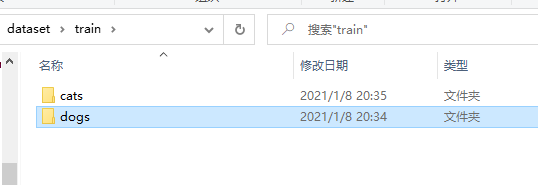

第二个参数为数据增强函数的调用，对加载的数据集进行相关数据操作

然后查看加载数据的信息与实际信息进行对比，是否有加载错误的情况,在使用此代码进行查看前数据加载中不要调用transforms，可以使用transforms=None来达到。如下图所示：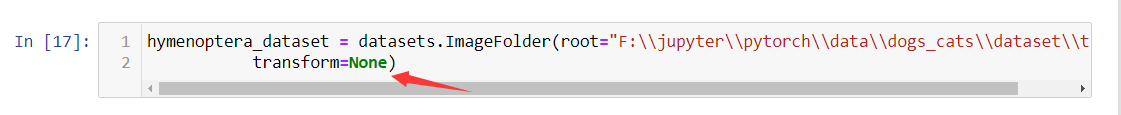

0
(500, 374)


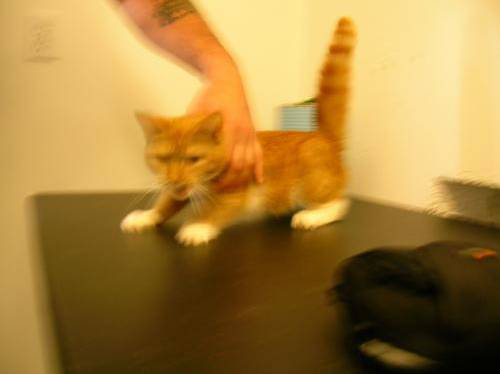

In [20]:
img, label = hymenoptera_dataset[0] #将启动魔法方法__getitem__(0)
print(label)
print(img.size)
img

需要什么的0表示的是猫，1表示狗，至于为什么这样，是由于标签文件夹的顺序有关，从上到下0，1,2...
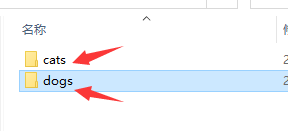

也可以进行图片尺寸和标签的查看，这个便是在进行正则化后的数据集加载查看，当把break去掉后便会显示所有图片的信息。

In [30]:
for img, label in hymenoptera_dataset: 
 print("图像img的形状{},标签label的值{}".format(img.shape, label))
 print("图像数据预处理后：\n",img)
 break

图像img的形状torch.Size([3, 32, 32]),标签label的值0
图像数据预处理后：
 tensor([[[ 1.8159,  1.8618,  1.8925,  ...,  1.9384,  1.9231,  1.9078],
         [ 1.8006,  1.8465,  1.8771,  ...,  1.9384,  1.9231,  1.9231],
         [ 1.7546,  1.8006,  1.8618,  ...,  1.9384,  1.9384,  1.9384],
         ...,
         [-0.8036, -0.7270, -0.7270,  ..., -1.4930, -1.5389, -1.6002],
         [-0.8496, -0.7883, -0.7883,  ..., -0.6351, -1.2172, -1.6155],
         [-0.8343, -0.8496, -0.8343,  ..., -1.1253, -1.3857, -1.6768]],

        [[ 1.3195,  1.3669,  1.4618,  ...,  1.7148,  1.7464,  1.7781],
         [ 1.3037,  1.3511,  1.4144,  ...,  1.7148,  1.7306,  1.7781],
         [ 1.2562,  1.3037,  1.3669,  ...,  1.7148,  1.7464,  1.7939],
         ...,
         [-1.0366, -1.0208, -1.0050,  ..., -1.4952, -1.5268, -1.5901],
         [-1.0524, -1.0524, -1.0524,  ..., -0.8469, -1.3054, -1.5901],
         [-1.0208, -1.0840, -1.0999,  ..., -1.2264, -1.4161, -1.6375]],

        [[ 0.2447,  0.2916,  0.3697,  ...,  0.7135,  0.7291,  

In [31]:
dataset_loader = torch.utils.data.DataLoader(hymenoptera_dataset,batch_size=4,shuffle=True) 

这样便对加载的数据进行了训练处理
batch_size=4表示加载的数据切分为4个为一组的
shuffle=True表示送人训练的的数据是打乱后送人的，而不是顺序输入

最后可以使用显示图片与对应标签的方式进行查验

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


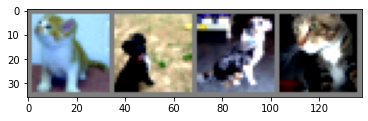

[ ' 小 猫 ' ,   ' 小 狗 ' ,   ' 小 狗 ' ,   ' 小 猫 ' ]


In [32]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 显示图像
def imshow(img):
 img = img / 2 + 0.5  # unnormalize
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()
# 随机获取部分训练数据
dataiter = iter(dataset_loader)#此处填写加载的数据集
images, labels = dataiter.next()
# 显示图像
imshow(torchvision.utils.make_grid(images))#make_grid的作用是将若干幅图像拼成一幅图像
# 打印标签
print(' '.join('%s' % ["小狗" if labels[j].item()==1 else "小猫" for j in range(4)]))

## 1.1 完整程序

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, utils,datasets
from PIL import Image
import pandas as pd
import numpy as np
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")

data_transform = transforms.Compose([
 transforms.Resize(32), # 缩放图片(Image)，保持长宽比不变，最短边为32像素
 transforms.CenterCrop(32), # 从图片中间切出32*32的图片
 transforms.ToTensor(), # 将图片(Image)转成Tensor，归一化至[0, 1]
 transforms.Normalize(mean=[0.492, 0.461, 0.417], std=[0.256, 0.248, 0.251]) # 标准化至[-1, 1]，规定均值和标准差
])

hymenoptera_dataset = datasets.ImageFolder(root="F:\\jupyter\\pytorch\\data\\dogs_cats\\dataset\\train",
           transform=data_transform)
dataset_loader = torch.utils.data.DataLoader(hymenoptera_dataset,batch_size=4,shuffle=True) 

# 2 第二种标签在图片名上的数据加载方法

同样先导入库

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, utils,datasets
from PIL import Image
import pandas as pd
import numpy as np
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")

然后通过继承Dateset类来进行数据的加载

In [34]:
class MyDataset(Dataset): #继承Dataset
    def __init__(self, path_dir, transform=None): #初始化一些属性
        self.path_dir = path_dir #文件路径
        self.transform = transform #对图形进行处理，如标准化、截取、转换等
        self.images = os.listdir(self.path_dir)#把路径下的所有文件放在一个列表中

    def __len__(self):#返回整个数据集的大小
        return len(self.images)

    def __getitem__(self,index):#根据索引index返回图像及标签
        image_index = self.images[index]#根据索引获取图像文件名称
        img_path = os.path.join(self.path_dir, image_index)#获取图像的路径或目录
        img = Image.open(img_path).convert('RGB')# 读取图像

        # 根据目录名称获取图像标签（cat或dog）
        label = img_path.split('\\')[-1].split('.')[0]
        #把字符转换为数字cat-0，dog-1
        label = 1 if 'dog' in label else 0

        if self.transform is not None:
            img = self.transform(img)
        return img,label

def __init__(self, path_dir, transform=None):主要的作用是获取数据集所在的路径的数据列表：
self.images = os.listdir(self.path_dir)
self.images这个张量中将存储path_dir路径中所有文件的名称和后缀名

具体情况见下图和下面的代码运行结果：
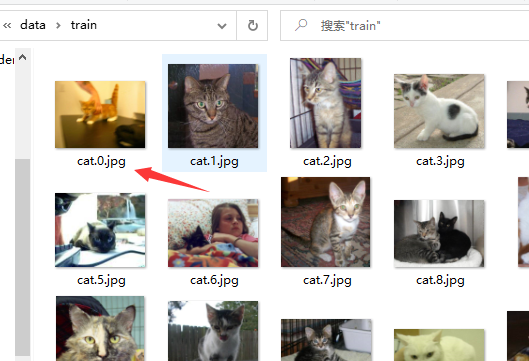

In [35]:
path_dir="F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train"
images = os.listdir(path_dir)
images

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

def __len__(self):主要作用是返回整个数据集的大小
实现方式len(self.images)

In [36]:
len(images)

25000

def __getitem__(self,index):根据索引index返回图像及标签，索引是根据文件夹内文件的顺序排列，从0开始递增

然后使用label = img_path.split('\\')[-1].split('.')[0]提取文件名中的标签

然后把对应的字符串标签转换为对应的数字label = 1 if 'dog' in label else 0

然后使用dataset进行加载

In [37]:
dataset = MyDataset("F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train",transform=None)

由于transforms设置为none所以数据没有进行处理，此时可以查看数据的尺寸标签等信息

<PIL.Image.Image image mode=RGB size=500x374 at 0x1F327B61CF8>
0


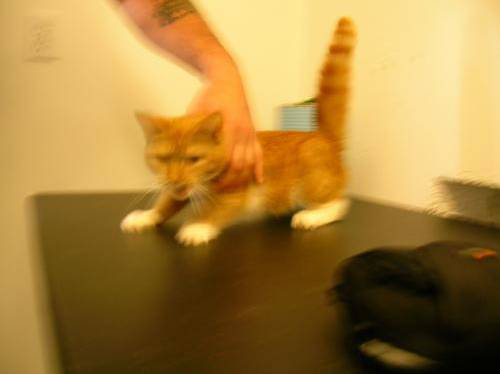

In [39]:
img, label = dataset[0] #将启动魔法方法__getitem__(0)
print(img)
print(label)
img

In [40]:
from torchvision import transforms as T
transform = T.Compose([
 T.Resize(32), # 缩放图片(Image)，保持长宽比不变，最短边为224像素
 T.CenterCrop(32), # 从图片中间切出224*224的图片
 T.ToTensor(), # 将图片(Image)转成Tensor，归一化至[0, 1]
 T.Normalize(mean=[0.492, 0.461, 0.417], std=[0.256, 0.248, 0.251]) # 标准化至[-1, 1]，规定均值和标准差
])

然后加入数据增强处理以后重新加载数据

In [41]:
dataset = MyDataset("F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train",transform=transform)

可以对处理后的数据进行查看

In [42]:
for img, label in dataset: 
 print("图像img的形状{},标签label的值{}".format(img.shape, label))
 print("图像数据预处理后：\n",img)
 break

图像img的形状torch.Size([3, 32, 32]),标签label的值0
图像数据预处理后：
 tensor([[[ 1.8159,  1.8618,  1.8925,  ...,  1.9384,  1.9231,  1.9078],
         [ 1.8006,  1.8465,  1.8771,  ...,  1.9384,  1.9231,  1.9231],
         [ 1.7546,  1.8006,  1.8618,  ...,  1.9384,  1.9384,  1.9384],
         ...,
         [-0.8036, -0.7270, -0.7270,  ..., -1.4930, -1.5389, -1.6002],
         [-0.8496, -0.7883, -0.7883,  ..., -0.6351, -1.2172, -1.6155],
         [-0.8343, -0.8496, -0.8343,  ..., -1.1253, -1.3857, -1.6768]],

        [[ 1.3195,  1.3669,  1.4618,  ...,  1.7148,  1.7464,  1.7781],
         [ 1.3037,  1.3511,  1.4144,  ...,  1.7148,  1.7306,  1.7781],
         [ 1.2562,  1.3037,  1.3669,  ...,  1.7148,  1.7464,  1.7939],
         ...,
         [-1.0366, -1.0208, -1.0050,  ..., -1.4952, -1.5268, -1.5901],
         [-1.0524, -1.0524, -1.0524,  ..., -0.8469, -1.3054, -1.5901],
         [-1.0208, -1.0840, -1.0999,  ..., -1.2264, -1.4161, -1.6375]],

        [[ 0.2447,  0.2916,  0.3697,  ...,  0.7135,  0.7291,  

In [43]:
#使用DataLoader加载数据
dataloader = DataLoader(dataset,batch_size=4,shuffle=True)
for batch_datas, batch_labels in dataloader:
    print(batch_datas.size(),batch_labels.size())
    break

torch.Size([4, 3, 32, 32]) torch.Size([4])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


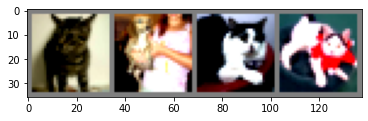

[ ' 小 猫 ' ,   ' 小 狗 ' ,   ' 小 猫 ' ,   ' 小 猫 ' ]


In [44]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 显示图像
def imshow(img):
 img = img / 2 + 0.5  # unnormalize
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()
# 随机获取部分训练数据
dataiter = iter(dataloader)
images, labels = dataiter.next()
# 显示图像
imshow(torchvision.utils.make_grid(images))
# 打印标签
print(' '.join('%s' % ["小狗" if labels[j].item()==1 else "小猫" for j in range(4)]))

## 2.1完整程序

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, utils,datasets
from PIL import Image
import pandas as pd
import numpy as np
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")

class MyDataset(Dataset): #继承Dataset
    def __init__(self, path_dir, transform=None): #初始化一些属性
        self.path_dir = path_dir #文件路径
        self.transform = transform #对图形进行处理，如标准化、截取、转换等
        self.images = os.listdir(self.path_dir)#把路径下的所有文件放在一个列表中

    def __len__(self):#返回整个数据集的大小
        return len(self.images)

    def __getitem__(self,index):#根据索引index返回图像及标签
        image_index = self.images[index]#根据索引获取图像文件名称
        img_path = os.path.join(self.path_dir, image_index)#获取图像的路径或目录
        img = Image.open(img_path).convert('RGB')# 读取图像

        # 根据目录名称获取图像标签（cat或dog）
        label = img_path.split('\\')[-1].split('.')[0]
        #把字符转换为数字cat-0，dog-1
        label = 1 if 'dog' in label else 0

        if self.transform is not None:
            img = self.transform(img)
        return img,label
    
from torchvision import transforms as T
transform = T.Compose([
 T.Resize(32), # 缩放图片(Image)，保持长宽比不变，最短边为224像素
 T.CenterCrop(32), # 从图片中间切出224*224的图片
 T.ToTensor(), # 将图片(Image)转成Tensor，归一化至[0, 1]
 T.Normalize(mean=[.5, .5, .5], std=[.5, .5, .5]) # 标准化至[-1, 1]，规定均值和标准差
])

dataset = MyDataset("F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train",transform=transform)
dataloader = DataLoader(dataset,batch_size=4,shuffle=True)

# 3 将数据集分为训练集，验证集和测试集的方法

大体上是以第二种方式作为加载数据的方式，然后将transforms直接内化到dataset中，并添加了数据集的划分。
本程序的讲解主要见程序注释

In [45]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torchvision import transforms as T
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, utils
from PIL import Image
import pandas as pd
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")

In [46]:
class MyDataset(Dataset): #继承Dataset
    def __init__(self, root, transforms=None, train=True, test=False): #初始化一些属性
        self.test = test#将test变量的赋值
        imgs = [os.path.join(root, img) for img in os.listdir(root)]#数据的路径列表
        if self.test:
            imgs = sorted(imgs, key=lambda x: int(x.split('.')[-2].split('\\')[-1]))
            #对测试集的数据进行排序
        else:
            imgs = sorted(imgs, key=lambda x: int(x.split('.')[-2]))
            #对非测试集的数据进行排序
            #排序的目的是便于后续的分割
        imgs_num = len(imgs)#获取数据的长度便于切分数据集
        if self.test:
            self.imgs = imgs#将测试集的数据直接导入
        elif train:
            self.imgs = imgs[:int(0.7 * imgs_num)]#将train中数据的70%给train
        else:
            self.imgs = imgs[int(0.7 * imgs_num):]#剩下的30%做验证集
    
        if transforms is None:#对数据进行增强处理
            normalize = T.Normalize(mean=[0.488,0.455,0.417],
                                    std=[0.261,0.255,0.257])
 
            if self.test or not train:
                self.transforms = T.Compose([
                    T.Resize(28),
                    T.CenterCrop(28),
                    T.ToTensor(),
                    normalize
                ])
            else:
                self.transforms = T.Compose([
                    T.Resize(28),
                    T.CenterCrop(28),
                    T.RandomHorizontalFlip(),
                    T.ToTensor(),
                    normalize
                ])

    def __len__(self):#返回整个数据集的大小
        return len(self.imgs)

    def __getitem__(self,index):#根据索引index返回图像及标签
        img_path = self.imgs[index]
        if self.test:
            label = int(self.imgs[index].split('.')[-2].split('\\')[-1])
            #获取测试集文件名的部分作为标签
        else:
            label = 1 if 'dog' in img_path.split('\\')[-1] else 0
            #获取train中文件名中的标签并进行数字化，dog为1，cat为0
        data = Image.open(img_path)
        data = self.transforms(data)
        return data, label

In [53]:
train_data = MyDataset("F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train",train=True)
val_data = MyDataset("F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train",train=False)

训练集train_data和验证集val_data加载数据时，需要将第二个参数train设置为对应的值，便可以获取对应的数据

由于dataset中直接默认进行了transforms操作所以如果需要获取未进行数据加强操作的dataseet需要对transforms相关的操作进行注释掉即可。



In [55]:
#训练集数据
img,label=train_data[0]
for img, label in dataset: 
 print("图像img的形状{},标签label的值{}".format(img.shape, label))
 print("图像数据预处理后：\n",img)
 break

图像img的形状torch.Size([3, 32, 32]),标签label的值0
图像数据预处理后：
 tensor([[[ 1.8159,  1.8618,  1.8925,  ...,  1.9384,  1.9231,  1.9078],
         [ 1.8006,  1.8465,  1.8771,  ...,  1.9384,  1.9231,  1.9231],
         [ 1.7546,  1.8006,  1.8618,  ...,  1.9384,  1.9384,  1.9384],
         ...,
         [-0.8036, -0.7270, -0.7270,  ..., -1.4930, -1.5389, -1.6002],
         [-0.8496, -0.7883, -0.7883,  ..., -0.6351, -1.2172, -1.6155],
         [-0.8343, -0.8496, -0.8343,  ..., -1.1253, -1.3857, -1.6768]],

        [[ 1.3195,  1.3669,  1.4618,  ...,  1.7148,  1.7464,  1.7781],
         [ 1.3037,  1.3511,  1.4144,  ...,  1.7148,  1.7306,  1.7781],
         [ 1.2562,  1.3037,  1.3669,  ...,  1.7148,  1.7464,  1.7939],
         ...,
         [-1.0366, -1.0208, -1.0050,  ..., -1.4952, -1.5268, -1.5901],
         [-1.0524, -1.0524, -1.0524,  ..., -0.8469, -1.3054, -1.5901],
         [-1.0208, -1.0840, -1.0999,  ..., -1.2264, -1.4161, -1.6375]],

        [[ 0.2447,  0.2916,  0.3697,  ...,  0.7135,  0.7291,  

In [56]:
#验证集数据
img,label=val_data[0]
for img, label in dataset: 
 print("图像img的形状{},标签label的值{}".format(img.shape, label))
 print("图像数据预处理后：\n",img)
 break

图像img的形状torch.Size([3, 32, 32]),标签label的值0
图像数据预处理后：
 tensor([[[ 1.8159,  1.8618,  1.8925,  ...,  1.9384,  1.9231,  1.9078],
         [ 1.8006,  1.8465,  1.8771,  ...,  1.9384,  1.9231,  1.9231],
         [ 1.7546,  1.8006,  1.8618,  ...,  1.9384,  1.9384,  1.9384],
         ...,
         [-0.8036, -0.7270, -0.7270,  ..., -1.4930, -1.5389, -1.6002],
         [-0.8496, -0.7883, -0.7883,  ..., -0.6351, -1.2172, -1.6155],
         [-0.8343, -0.8496, -0.8343,  ..., -1.1253, -1.3857, -1.6768]],

        [[ 1.3195,  1.3669,  1.4618,  ...,  1.7148,  1.7464,  1.7781],
         [ 1.3037,  1.3511,  1.4144,  ...,  1.7148,  1.7306,  1.7781],
         [ 1.2562,  1.3037,  1.3669,  ...,  1.7148,  1.7464,  1.7939],
         ...,
         [-1.0366, -1.0208, -1.0050,  ..., -1.4952, -1.5268, -1.5901],
         [-1.0524, -1.0524, -1.0524,  ..., -0.8469, -1.3054, -1.5901],
         [-1.0208, -1.0840, -1.0999,  ..., -1.2264, -1.4161, -1.6375]],

        [[ 0.2447,  0.2916,  0.3697,  ...,  0.7135,  0.7291,  

In [57]:
#使用DataLoader加载训练集数据
train_dataloader = DataLoader(train_data,batch_size=4,shuffle=True)
for batch_datas, batch_labels in dataloader:
    print(batch_datas.size(),batch_labels.size())
    break

torch.Size([4, 3, 32, 32]) torch.Size([4])


In [58]:
#使用DataLoader加载验证集数据
val_dataloader = DataLoader(val_data,batch_size=4,shuffle=True)
for batch_datas, batch_labels in dataloader:
    print(batch_datas.size(),batch_labels.size())
    break

torch.Size([4, 3, 32, 32]) torch.Size([4])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


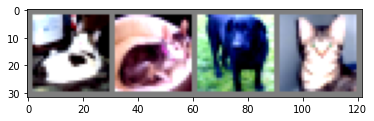

[ ' 小 猫 ' ,   ' 小 狗 ' ,   ' 小 狗 ' ,   ' 小 猫 ' ]


In [59]:
#训练集的数据
import torchvision
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 显示图像
def imshow(img):
 img = img / 2 + 0.5  # unnormalize
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()
# 随机获取部分训练数据
dataiter = iter(train_dataloader)
images, labels = dataiter.next()
# 显示图像
imshow(torchvision.utils.make_grid(images))
# 打印标签
print(' '.join('%s' % ["小狗" if labels[j].item()==1 else "小猫" for j in range(4)]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


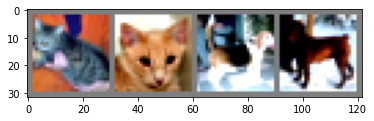

[ ' 小 猫 ' ,   ' 小 猫 ' ,   ' 小 狗 ' ,   ' 小 狗 ' ]


In [60]:
#验证集的数据
import torchvision
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 显示图像
def imshow(img):
 img = img / 2 + 0.5  # unnormalize
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()
# 随机获取部分训练数据
dataiter = iter(val_dataloader)
images, labels = dataiter.next()
# 显示图像
imshow(torchvision.utils.make_grid(images))
# 打印标签
print(' '.join('%s' % ["小狗" if labels[j].item()==1 else "小猫" for j in range(4)]))

## 3.1完整的程序

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torchvision import transforms as T
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, utils
from PIL import Image
import pandas as pd
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")

class MyDataset(Dataset): #继承Dataset
    def __init__(self, root, transforms=None, train=True, test=False): #初始化一些属性
        self.test = test
        imgs = [os.path.join(root, img) for img in os.listdir(root)]
        if self.test:
            imgs = sorted(imgs, key=lambda x: int(x.split('.')[-2].split('\\')[-1]))
        else:
            imgs = sorted(imgs, key=lambda x: int(x.split('.')[-2]))
        imgs_num = len(imgs)
        if self.test:
            self.imgs = imgs
        elif train:
            self.imgs = imgs[:int(0.7 * imgs_num)]
        else:
            self.imgs = imgs[int(0.7 * imgs_num):]
    
        if transforms is None:
            normalize = T.Normalize(mean=[0.488,0.455,0.417],
                                    std=[0.261,0.255,0.257])
 
            if self.test or not train:
                self.transforms = T.Compose([
                    T.Resize(28),
                    T.CenterCrop(28),
                    T.ToTensor(),
                    normalize
                ])
            else:
                self.transforms = T.Compose([
                    T.Resize(28),
                    T.CenterCrop(28),
                    T.RandomHorizontalFlip(),
                    T.ToTensor(),
                    normalize
                ])

    def __len__(self):#返回整个数据集的大小
        return len(self.imgs)

    def __getitem__(self,index):#根据索引index返回图像及标签
        img_path = self.imgs[index]
        if self.test:
            label = int(self.imgs[index].split('.')[-2].split('\\')[-1])
        else:
            label = 1 if 'dog' in img_path.split('\\')[-1] else 0
        data = Image.open(img_path)
        data = self.transforms(data)
        return data, label
    
train_data = MyDataset("F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train",train=True)
val_data = MyDataset("F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train",train=False)

train_loader = torch.utils.data.DataLoader(train_data,batch_size=4,shuffle=True) 
val_loader = torch.utils.data.DataLoader(val_data,batch_size=4,shuffle=True) 

# 4 .csv文件存储标签的数据集的加载的方法

本数据集加载使用的数据集是给狗进行种类的识别的数据集 
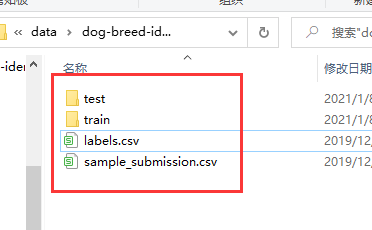
有测试集，训练集，还有存有训练集标签和对应标签的文件名的csv文件
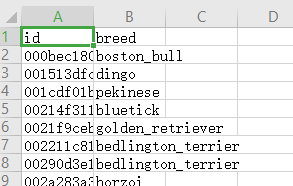

使用的加载方式与最开始的第一种加载方式相同，所以需要将每一个种类的数据照片放到对应种类命名的文件夹中

首先是进行数据集的拆分，导入对应的库

In [62]:
import math
import os
import shutil
from collections import Counter 

然后设置下面会用到的一些变量

In [63]:
data_dir = "F:\\jupyter\\pytorch\\data\\dog-breed-identification"#数据集的根目录
label_file = 'labels.csv'#根目录中csv的文件名加后缀
train_dir = 'train'#根目录中的训练集文件夹的名字
test_dir = 'test'#根目录中的测试集文件夹的名字
input_dir = 'train_valid_test'#用于存放拆分数据集的文件夹的名字，可以不用先创建，会自动创建
batch_size = 4#送往训练的一批次中的数据集的个数
valid_ratio = 0.1#将训练集拆分为90%为训练集10%为验证集

拆分程序的目的是将训练集拆分为训练集和验证集然后分别放到对应的文件夹中，将测试集放到
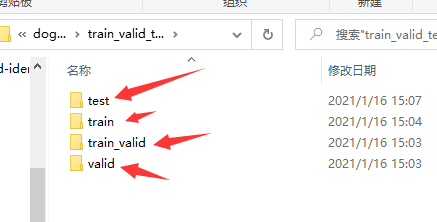
训练集和验证集的文件夹中都是一个个种类的小文件夹，其中存放着对应的数据集图像
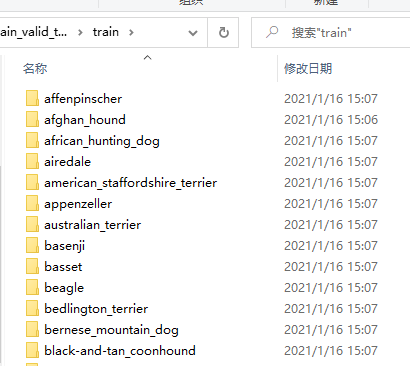
而train_valid则存放着训练集和验证集所有数量的训练数据

而由于test中没有标签所以所有的数据照片都存放在unknown中的
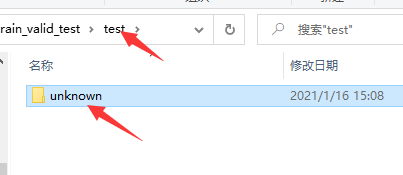

In [64]:
def reorg_dog_data(data_dir, label_file, train_dir, test_dir, input_dir,
                   valid_ratio):
    # 读取训练数据标签，label.csv文件读取标签以及对应的文件名。
    with open(os.path.join(data_dir, label_file), 'r') as f:
        # 跳过文件头行（栏名称）。
        lines = f.readlines()[1:]
        tokens = [l.rstrip().split(',') for l in lines]
        idx_label = dict(((idx, label) for idx, label in tokens))
    labels = set(idx_label.values())

    num_train = len(os.listdir(os.path.join(data_dir, train_dir)))#获取训练集的数量便于数据集的分割
    # 训练集中数量最少一类的狗的数量。
    min_num_train_per_label = (
        Counter(idx_label.values()).most_common()[:-2:-1][0][1])
    # 验证集中每类狗的数量。
    num_valid_per_label = math.floor(min_num_train_per_label * valid_ratio)
    label_count = dict()

    def mkdir_if_not_exist(path):#判断是否有存放拆分后数据集的文件夹，没有就创建一个
        if not os.path.exists(os.path.join(*path)):
            os.makedirs(os.path.join(*path))

    # 整理训练和验证集，将数据集进行拆分复制到预先设置好的存放文件夹中。
    for train_file in os.listdir(os.path.join(data_dir, train_dir)):
        idx = train_file.split('.')[0]
        label = idx_label[idx]
        mkdir_if_not_exist([data_dir, input_dir, 'train_valid', label])
        shutil.copy(os.path.join(data_dir, train_dir, train_file),
                    os.path.join(data_dir, input_dir, 'train_valid', label))
        if label not in label_count or label_count[label] < num_valid_per_label:
            mkdir_if_not_exist([data_dir, input_dir, 'valid', label])
            shutil.copy(os.path.join(data_dir, train_dir, train_file),
                        os.path.join(data_dir, input_dir, 'valid', label))
            label_count[label] = label_count.get(label, 0) + 1
        else:
            mkdir_if_not_exist([data_dir, input_dir, 'train', label])
            shutil.copy(os.path.join(data_dir, train_dir, train_file),
                        os.path.join(data_dir, input_dir, 'train', label))

    # 整理测试集，将测试集复制存放在新建路径下的unknown文件夹中。
    mkdir_if_not_exist([data_dir, input_dir, 'test', 'unknown'])
    for test_file in os.listdir(os.path.join(data_dir, test_dir)):
        shutil.copy(os.path.join(data_dir, test_dir, test_file),
                    os.path.join(data_dir, input_dir, 'test', 'unknown'))

In [65]:
#载入数据，进行数据的拆分
reorg_dog_data(data_dir, label_file, train_dir, test_dir, input_dir,valid_ratio)

数据拆分后便可以进行数据的加载了，使用ImageFolder进行数据集的加载，在加载前需要进行数据强化函数的定义
也可以利用前面提及的在未进行transforms处理之前对加载的数据集进行查验，此处就不做赘述。

In [66]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, datasets
from PIL import Image
import pandas as pd
import numpy as np
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")

In [80]:
# transform_train = transforms.Compose([
#     # 随机对图像裁剪出面积为原图像面积0.08~1倍、且高和宽之比在3/4~4/3的图像，再放缩为高和宽均为224像素的新图像
#     transforms.RandomResizedCrop(28, scale=(0.08, 1.0),  
#                                  ratio=(3.0/4.0, 4.0/3.0)),
#     # 以0.5的概率随机水平翻转
#     transforms.RandomHorizontalFlip(),
#     # 随机更改亮度、对比度和饱和度
#     transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
#     transforms.ToTensor(),
#     # 对各个通道做标准化，(0.485, 0.456, 0.406)和(0.229, 0.224, 0.225)是在ImageNet上计算得的各通道均值与方差
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet上的均值和方差
# ])

# # 在测试集上的图像增强只做确定性的操作
# transform_test = transforms.Compose([
#     transforms.Resize(28),
#     # 将图像中央的高和宽均为224的正方形区域裁剪出来
#     transforms.CenterCrop(28),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])
#也可以使用之前的transforms的函数
data_transform = transforms.Compose([
 transforms.Resize(32), # 缩放图片(Image)，保持长宽比不变，最短边为32像素
 transforms.CenterCrop(32), # 从图片中间切出32*32的图片
 transforms.ToTensor(), # 将图片(Image)转成Tensor，归一化至[0, 1]
 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])# 标准化至[-1, 1]，规定均值和标准差

In [81]:
import torchvision
#然后开始加载数据集
new_data_dir="F:\\jupyter\\pytorch\\data\\dog-breed-identification\\train_valid_test"
train_ds = datasets.ImageFolder(root=os.path.join(new_data_dir, 'train'),transform=transform_train)
valid_ds = datasets.ImageFolder(root=os.path.join(new_data_dir, 'valid'),transform=transform_train)

In [82]:
#训练数据
img,label=train_ds[0]
for img, label in dataset: 
 print("图像img的形状{},标签label的值{}".format(img.shape, label))
 print("图像数据预处理后：\n",img)
 break

图像img的形状torch.Size([3, 32, 32]),标签label的值0
图像数据预处理后：
 tensor([[[ 1.8159,  1.8618,  1.8925,  ...,  1.9384,  1.9231,  1.9078],
         [ 1.8006,  1.8465,  1.8771,  ...,  1.9384,  1.9231,  1.9231],
         [ 1.7546,  1.8006,  1.8618,  ...,  1.9384,  1.9384,  1.9384],
         ...,
         [-0.8036, -0.7270, -0.7270,  ..., -1.4930, -1.5389, -1.6002],
         [-0.8496, -0.7883, -0.7883,  ..., -0.6351, -1.2172, -1.6155],
         [-0.8343, -0.8496, -0.8343,  ..., -1.1253, -1.3857, -1.6768]],

        [[ 1.3195,  1.3669,  1.4618,  ...,  1.7148,  1.7464,  1.7781],
         [ 1.3037,  1.3511,  1.4144,  ...,  1.7148,  1.7306,  1.7781],
         [ 1.2562,  1.3037,  1.3669,  ...,  1.7148,  1.7464,  1.7939],
         ...,
         [-1.0366, -1.0208, -1.0050,  ..., -1.4952, -1.5268, -1.5901],
         [-1.0524, -1.0524, -1.0524,  ..., -0.8469, -1.3054, -1.5901],
         [-1.0208, -1.0840, -1.0999,  ..., -1.2264, -1.4161, -1.6375]],

        [[ 0.2447,  0.2916,  0.3697,  ...,  0.7135,  0.7291,  

In [72]:
#验证集数据
img,label=val_data[0]
for img, label in dataset: 
 print("图像img的形状{},标签label的值{}".format(img.shape, label))
 print("图像数据预处理后：\n",img)
 break

图像img的形状torch.Size([3, 32, 32]),标签label的值0
图像数据预处理后：
 tensor([[[ 1.8159,  1.8618,  1.8925,  ...,  1.9384,  1.9231,  1.9078],
         [ 1.8006,  1.8465,  1.8771,  ...,  1.9384,  1.9231,  1.9231],
         [ 1.7546,  1.8006,  1.8618,  ...,  1.9384,  1.9384,  1.9384],
         ...,
         [-0.8036, -0.7270, -0.7270,  ..., -1.4930, -1.5389, -1.6002],
         [-0.8496, -0.7883, -0.7883,  ..., -0.6351, -1.2172, -1.6155],
         [-0.8343, -0.8496, -0.8343,  ..., -1.1253, -1.3857, -1.6768]],

        [[ 1.3195,  1.3669,  1.4618,  ...,  1.7148,  1.7464,  1.7781],
         [ 1.3037,  1.3511,  1.4144,  ...,  1.7148,  1.7306,  1.7781],
         [ 1.2562,  1.3037,  1.3669,  ...,  1.7148,  1.7464,  1.7939],
         ...,
         [-1.0366, -1.0208, -1.0050,  ..., -1.4952, -1.5268, -1.5901],
         [-1.0524, -1.0524, -1.0524,  ..., -0.8469, -1.3054, -1.5901],
         [-1.0208, -1.0840, -1.0999,  ..., -1.2264, -1.4161, -1.6375]],

        [[ 0.2447,  0.2916,  0.3697,  ...,  0.7135,  0.7291,  

In [83]:
train_loader = torch.utils.data.DataLoader(train_ds,batch_size=4,shuffle=True) 
valid_loader = torch.utils.data.DataLoader(valid_ds,batch_size=4,shuffle=True) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


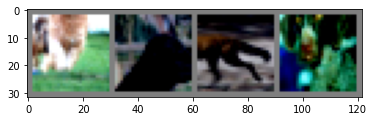

tensor(23) tensor(34) tensor(36) tensor(47)


In [86]:
#训练集数据
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 显示图像
def imshow(img):
 img = img / 2 + 0.5  # unnormalize
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()
# 随机获取部分训练数据
dataiter = iter(train_loader)#换此处的值即可切换数据集
images, labels = dataiter.next()
# 显示图像
imshow(torchvision.utils.make_grid(images))
# 打印标签
print(labels[0],labels[1],labels[2],labels[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


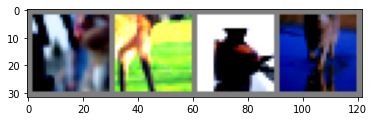

tensor(29) tensor(36) tensor(72) tensor(17)


In [87]:
#验证集数据
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 显示图像
def imshow(img):
 img = img / 2 + 0.5  # unnormalize
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()
# 随机获取部分训练数据
dataiter = iter(valid_loader)#换此处的值即可切换数据集
images, labels = dataiter.next()
# 显示图像
imshow(torchvision.utils.make_grid(images))
# 打印标签
print(labels[0],labels[1],labels[2],labels[3])

由于有一百多种，使用此处直接使用标签数字表示，可以建立一个标签类，根据标签顺序进行分类
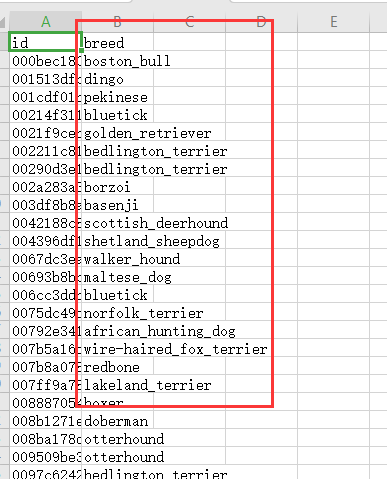

## 4.1完整程序

In [ ]:
#数据集的分割
import math
import os
import shutil
from collections import Counter 
def reorg_dog_data(data_dir, label_file, train_dir, test_dir, input_dir,
                   valid_ratio):
    # 读取训练数据标签。
    with open(os.path.join(data_dir, label_file), 'r') as f:
        # 跳过文件头行（栏名称）。
        lines = f.readlines()[1:]
        tokens = [l.rstrip().split(',') for l in lines]
        idx_label = dict(((idx, label) for idx, label in tokens))
    labels = set(idx_label.values())

    num_train = len(os.listdir(os.path.join(data_dir, train_dir)))
    # 训练集中数量最少一类的狗的数量。
    min_num_train_per_label = (
        Counter(idx_label.values()).most_common()[:-2:-1][0][1])
    # 验证集中每类狗的数量。
    num_valid_per_label = math.floor(min_num_train_per_label * valid_ratio)
    label_count = dict()

    def mkdir_if_not_exist(path):
        if not os.path.exists(os.path.join(*path)):
            os.makedirs(os.path.join(*path))

    # 整理训练和验证集。
    for train_file in os.listdir(os.path.join(data_dir, train_dir)):
        idx = train_file.split('.')[0]
        label = idx_label[idx]
        mkdir_if_not_exist([data_dir, input_dir, 'train_valid', label])
        shutil.copy(os.path.join(data_dir, train_dir, train_file),
                    os.path.join(data_dir, input_dir, 'train_valid', label))
        if label not in label_count or label_count[label] < num_valid_per_label:
            mkdir_if_not_exist([data_dir, input_dir, 'valid', label])
            shutil.copy(os.path.join(data_dir, train_dir, train_file),
                        os.path.join(data_dir, input_dir, 'valid', label))
            label_count[label] = label_count.get(label, 0) + 1
        else:
            mkdir_if_not_exist([data_dir, input_dir, 'train', label])
            shutil.copy(os.path.join(data_dir, train_dir, train_file),
                        os.path.join(data_dir, input_dir, 'train', label))

    # 整理测试集。
    mkdir_if_not_exist([data_dir, input_dir, 'test', 'unknown'])
    for test_file in os.listdir(os.path.join(data_dir, test_dir)):
        shutil.copy(os.path.join(data_dir, test_dir, test_file),
                    os.path.join(data_dir, input_dir, 'test', 'unknown'))

reorg_dog_data(data_dir, label_file, train_dir, test_dir, input_dir,
                   valid_ratio)

#加载数据集
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, datasets
from PIL import Image
import pandas as pd
import numpy as np
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")
transform_train = transforms.Compose([
    # 随机对图像裁剪出面积为原图像面积0.08~1倍、且高和宽之比在3/4~4/3的图像，再放缩为高和宽均为224像素的新图像
    transforms.RandomResizedCrop(28, scale=(0.08, 1.0),  
                                 ratio=(3.0/4.0, 4.0/3.0)),
    # 以0.5的概率随机水平翻转
    transforms.RandomHorizontalFlip(),
    # 随机更改亮度、对比度和饱和度
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
    transforms.ToTensor(),
    # 对各个通道做标准化，(0.485, 0.456, 0.406)和(0.229, 0.224, 0.225)是在ImageNet上计算得的各通道均值与方差
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet上的均值和方差
])

# 在测试集上的图像增强只做确定性的操作
transform_test = transforms.Compose([
    transforms.Resize(28),
    # 将图像中央的高和宽均为224的正方形区域裁剪出来
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
import torchvision
#然后开始加载数据集
new_data_dir="F:\\jupyter\\pytorch\\data\\dog-breed-identification\\train_valid_test"

train_ds = datasets.ImageFolder(root=os.path.join(new_data_dir, 'train'),transform=transform_train)
valid_ds = datasets.ImageFolder(root=os.path.join(new_data_dir, 'valid'),transform=transform_train)

train_loader = torch.utils.data.DataLoader(train_ds,batch_size=4,shuffle=True) 
valid_loader = torch.utils.data.DataLoader(valid_ds,batch_size=4,shuffle=True) 